In [6]:
import os
import numpy as np
import pandas as pd
import pyswarm
import scipy.stats as sps

import argus_shapes
import pulse2percept as p2p

import sklearn.base as sklb
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline
plt.style.use('seaborn-talk')

In [2]:
# If environment variable 'DATA_ROOT' does not exist, data will be automatically downloaded
# from OSF and stored in '../data/argus_shapes':
datafolder = os.environ['DATA_ROOT'] if 'DATA_ROOT' in os.environ else os.path.join('..', 'data')
subjectdata = argus_shapes.load_subjects(os.path.join(datafolder, 'subjects.csv'))

In [3]:
subject = 'S4'

(-4000, 6000)

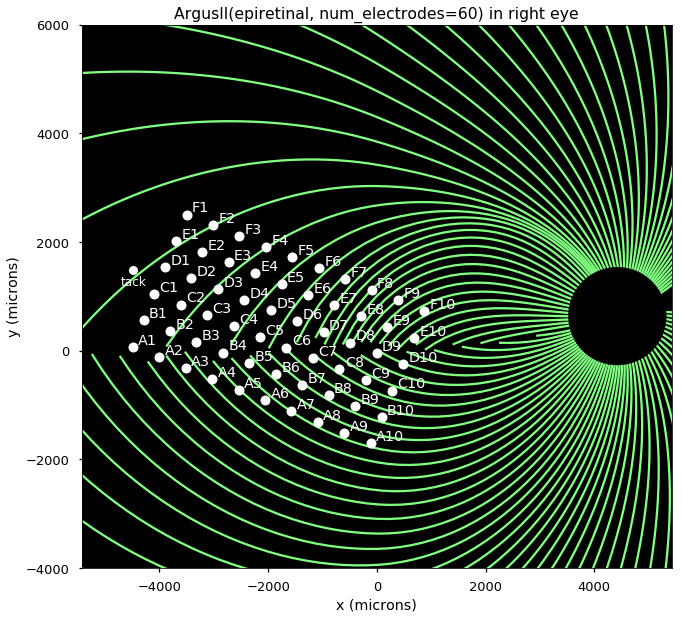

In [7]:
implant_type = subjectdata.loc[subject, 'implant_type']
implant_rot = subjectdata.loc[subject, 'implant_rot']
implant = implant_type(x_center=subjectdata.loc[subject, 'implant_x'], 
                       y_center=subjectdata.loc[subject, 'implant_y'],
                       rot=implant_rot)
sim = p2p.Simulation(implant)
sim.set_optic_fiber_layer(sampling=500, n_rho=71, n_axons=301, x_range=(0, 0), y_range=(0, 0),
                          rho_range=(1.0, 45.0),
                          loc_od=(subjectdata.loc[subject, 'loc_od_x'], 
                                  subjectdata.loc[subject, 'loc_od_y']))

fig, ax = plt.subplots(figsize=(20, 10))
sim.plot_fundus(ax=ax, annotate=True, upside_down=False)
for t in ax.texts:
        if 'temporal' in t.get_text() or 'nasal' in t.get_text():
            t.set_visible(False)
            # Plot optic nerve head:
x_od = argus_shapes.utils.dva2ret(subjectdata.loc[subject, 'loc_od_x'])
y_od = argus_shapes.utils.dva2ret(subjectdata.loc[subject, 'loc_od_y'])
ax.add_patch(patches.Circle((x_od, y_od), radius=900, alpha=1, color='black', zorder=100))

ax.set_ylim(-4000, 6000)